<a href="https://colab.research.google.com/github/dourivaljunior/estudos-sobre-python-machine-learning-deep-learning/blob/main/script_diabetes_v%C3%A1rios_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
# loading the dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis = 1)
y = df['Outcome']
SEED = 42
np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print('O dataset de treino possui {} pacientes e o de teste {} pacientes.'.format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 614 pacientes e o de teste 154 pacientes.


In [ ]:
#fazendo o estudo da exatidão de vários modelos ao mesmo tempo
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model_DT = DecisionTreeClassifier(max_depth=4)
model_svc = SVC()
model_log = LogisticRegression(solver='liblinear')
model_rand = RandomForestClassifier(n_estimators=100)
models = [model_DT, model_svc, model_log, model_rand]
name = ['Árvore de Decisão', 'SVC', 
        'Regressão Logística', 'Random Forest']
count = 0
for item in models:
    results = cross_val_score(item, X_train, y_train, cv = cv, scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média - Modelo {}: {:.2f}%'.format(name[count], mean*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'.format(name[count],(mean - 2*dv)*100, (mean + 2*dv)*100))
    count += 1

Acurácia média - Modelo Árvore de Decisão: 74.27%
Intervalo de acurácia - Modelo Árvore de Decisão: [69.34% ~ 79.20%]

Acurácia média - Modelo SVC: 75.90%
Intervalo de acurácia - Modelo SVC: [73.13% ~ 78.67%]

Acurácia média - Modelo Regressão Logística: 74.75%
Intervalo de acurácia - Modelo Regressão Logística: [66.38% ~ 83.12%]

Acurácia média - Modelo Random Forest: 76.22%
Intervalo de acurácia - Modelo Random Forest: [70.32% ~ 82.12%]



In [ ]:
def intervalo_prec(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean*100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'
          .format((mean - 2*dv)*100, (mean + 2*dv)*100))
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X_train, y_train, cv = cv, 
                          scoring = 'precision')
intervalo_prec(results)

Precisão média: 74.09%
Intervalo de Precisão: [62.70% ~ 85.49%]


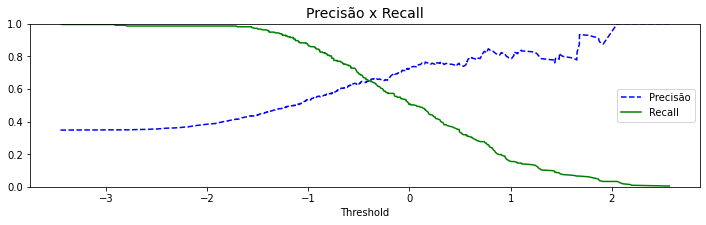

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = LogisticRegression(solver='liblinear')
y_scores = cross_val_predict(model, X_train, y_train, cv = cv,
                             method = 'decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train,  
                                                         y_scores)
fig, ax = plt.subplots(figsize = (12,3))
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score 
y_train_pred_recall_90 = (y_scores > -1)
print('Nova precisão: {:.4f}'
       .format(precision_score(y_train,y_train_pred_recall_90)))
print('Novo recall: {:.4f}'
       .format(recall_score(y_train,y_train_pred_recall_90)))

Nova precisão: 0.5303
Novo recall: 0.8638


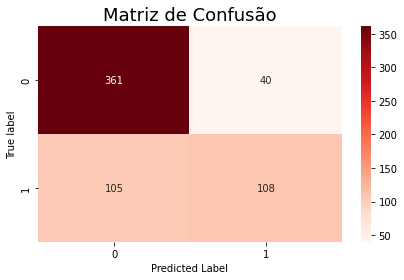

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = LogisticRegression(solver='liblinear')
y_pred = cross_val_predict(model, X_train, y_train, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [ ]:
# relatório do melhor modelo
from sklearn.metrics import classification_report
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=2))

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       401
           1       0.73      0.51      0.60       213

    accuracy                           0.76       614
   macro avg       0.75      0.70      0.72       614
weighted avg       0.76      0.76      0.75       614



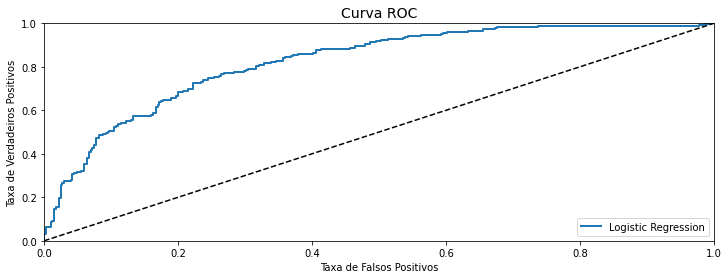

Área sob a curva ROC: 0.8221


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(fpr, tpr, linewidth=2, label = 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)
plt.show()
from sklearn.metrics import roc_auc_score
print('Área sob a curva ROC: {:.4f}'
      .format(roc_auc_score(y_train, y_scores)))

In [ ]:
np.random.seed(SEED)
final_model = LogisticRegression(solver='liblinear')
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", 
       classification_report(y_test, y_pred, digits=4))
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_prob[:,1])))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.7981    0.8384    0.8177        99
           1     0.6800    0.6182    0.6476        55

    accuracy                         0.7597       154
   macro avg     0.7390    0.7283    0.7327       154
weighted avg     0.7559    0.7597    0.7570       154

AUC: 0.8193



In [ ]:
#

In [ ]:
y_scores_final = final_model.decision_function(X_test)
y_test_pred_recall_90 = (y_scores_final > 0.5)
print('Nova precisão: {:.4f}'
      .format(precision_score(y_test,y_test_pred_recall_90)))
print('Novo recall: {:.4f}'
      .format(recall_score(y_test,y_test_pred_recall_90)))

Nova precisão: 0.8000
Novo recall: 0.5091


In [2]:
#fazer os plots